### Importing necessary libraries for data manipulation, model training, and evaluation

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
from scipy.stats import uniform, randint

### Loading the Dataset

The dataset is loaded into a Pandas DataFrame from a CSV file using the `read_csv()` function.


In [89]:
# loading the dataset
data = pd.read_csv(r'C:\Users\theam\OneDrive\Desktop\dataset\df_cleaned.csv')

In [87]:
data

,Fat_Low,Fat_Regular,Type_Baking,Type_Breads,Type_Breakfast,Type_Canned,Type_Dairy,Type_Frozen,Type_Fruits,Type_HardDrinks,...,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age,Item_Weight_zscore,Item_Visibility_zscore,Item_MRP_zscore,Item_Outlet_Sales_zscore
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.826565,-0.971109,1.800763,0.139541,1.122235,-0.139541,0.831138,0.970675,1.747351,0.910548
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.621276,-0.908784,-1.476024,1.334103,-1.074526,-1.334103,1.630714,0.908058,1.488936,1.018381
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.101430,-0.957359,0.041710,0.139541,0.029187,-0.139541,1.108662,0.956861,0.010040,0.049235
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.501136,-1.280664,0.699815,0.020085,-0.881687,-0.020085,1.510816,1.281683,0.660011,0.849053
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.913560,-1.280664,-1.385102,-1.293934,-0.706622,1.293934,0.918665,1.281683,1.399138,0.695332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8321,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.399086,-0.185302,1.227034,-1.293934,0.483735,1.293934,1.407164,0.181183,1.180714,0.349894
8322,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.042877,-0.374364,-0.502324,0.497909,-1.003877,-0.497909,1.048774,0.371132,0.527270,0.956346
8323,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.520908,-0.601914,-0.876838,0.736822,-0.574212,-0.736822,0.523609,0.599749,0.897155,0.579066
8324,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.317969,1.520668,-0.584005,1.334103,-0.138770,-1.334103,1.325550,1.532790,0.607941,0.196713


### Correlation Matrix

The correlation matrix below shows the relationships between various features in the dataset. This matrix helps identify pairs of features with strong positive or negative correlations, which may impact feature selection and model performance. Darker shades indicate stronger correlations, with positive correlations in red and negative correlations in blue.

- **High positive correlations** (closer to 1) indicate that as one feature increases, the other also increases.
- **High negative correlations** (closer to -1) suggest that as one feature increases, the other decreases.

This information can help in identifying multicollinearity, understanding feature importance, or even simplifying the model by removing redundant features.


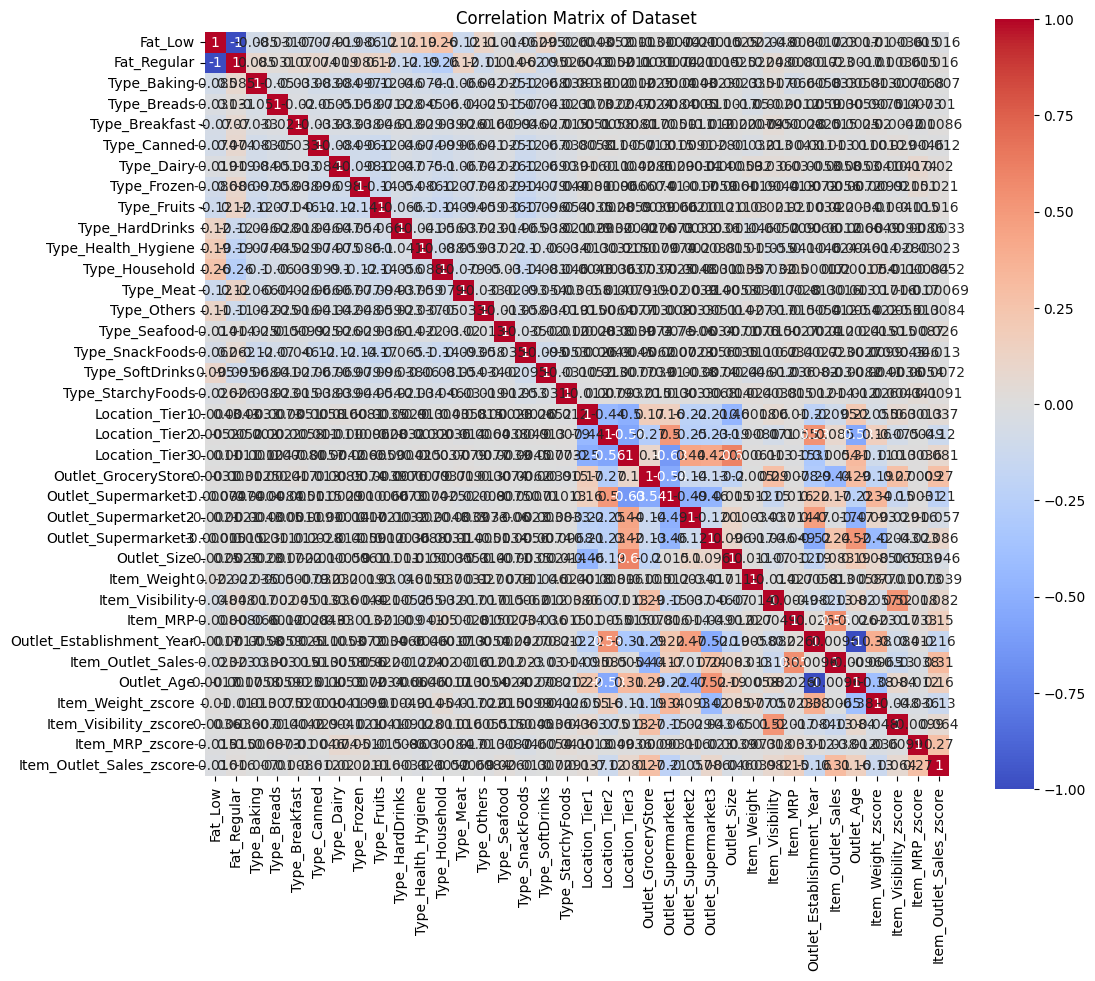

In [101]:
# Generate and visualize the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar=True)
plt.title("Correlation Matrix of Dataset")
plt.show()


### Separating Features and Target Variable, and Splitting the Dataset

1. **Separating Features (X) and Target Variable (y)**:
   - The features (input variables) are stored in `X`, and the target variable (the variable to predict) is stored in `y`.
   - The `Item_Outlet_Sales` column is dropped from the dataset to form the feature set (`X`), while it is extracted as the target variable (`y`).
   
   ```python
   X = data.drop('Item_Outlet_Sales', axis=1)  # Features
   y = data['Item_Outlet_Sales']  # Target


In [91]:
# Separating features (X) and target variable (y)
X = data.drop('Item_Outlet_Sales', axis=1)  # Features
y = data['Item_Outlet_Sales']  # Target

# Splitting the data into training and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Determining Feature Importance with RandomForestRegressor
In this cell, we use a `RandomForestRegressor` to identify the most important features in our dataset. By selecting only the top features, we aim to simplify the model and improve its performance.

- **RandomForestRegressor for Feature Importance**:
  - A `RandomForestRegressor` with 100 trees (`n_estimators=100`) is trained on the training data.
  - Feature importance scores, which indicate how influential each feature is in predicting the target variable, are extracted after fitting the model.

- **Selecting Top Features**:
  - The feature importance scores are stored as a pandas Series, with feature names as the index.
  - The `nlargest(10)` function is used to select the top 10 most important features, which are then stored in `top_features`.
  - We filter the original feature set (`X`) to retain only these top 10 features, resulting in `X_top`.
  - The training and test sets are updated to include only the selected top features.

After this step, the dataset is reduced to the most significant features, helping the model to potentially perform better by focusing on key predictors.


In [51]:
# Using RandomForestRegressor to determine feature importance
feature_selector = RandomForestRegressor(n_estimators=100, random_state=42)
feature_selector.fit(x_train, y_train)

# Selecting the top 10 important features based on feature importance scores
feature_importances = pd.Series(feature_selector.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(10).index
X_top = X[top_features]

x_train, x_test = x_train[top_features], x_test[top_features]

### Defining and Evaluating Multiple Regression Models
In this section, we define and evaluate a variety of regression models to determine which performs best on the dataset. We employ a repeated train-test split approach to assess the models' stability and performance.

- **Model Definitions**:
  - A dictionary called `models` is created with several regression models, including:
    - **Linear Regression**: A basic linear model.
    - **Polynomial Regression**: A pipeline combining polynomial features (degree=2) with linear regression.
    - **Decision Tree and Random Forest**: Tree-based models for capturing non-linear relationships.
    - **Support Vector Regression**: A pipeline scaling data for support vector regression with a linear kernel.
    - **K-Nearest Neighbors (KNN) Regression**: A neighborhood-based approach with 5 neighbors.
    - **XGBoost Regression**: A gradient boosting model with 100 estimators, a learning rate of 0.1, and a maximum depth of 3.

- **Repeated Evaluation for Stability**:
  - We repeat the train-test split and model evaluation 10 times (`n_runs=10`), each time using a different random state to ensure the R² score results are stable.
  - For each model and split, we fit the model to the training data, predict on the test data, and calculate the R² score, storing these scores in `test_r2_scores`.

- **Results Calculation and Display**:
  - The mean and standard deviation of the test R² scores are calculated for each model to summarize performance.
  - Results are stored in the `results` dictionary and displayed with the mean and standard deviation of the R² scores for each model.

This approach provides a robust comparison of models by assessing both the average performance and variability across multiple train-test splits.


In [53]:
# Defining multiple regression models for evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "Decision Tree": DecisionTreeRegressor(random_state=2),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": make_pipeline(StandardScaler(), SVR(kernel='linear')),
    "KNN Regression": KNeighborsRegressor(n_neighbors=5),
    "XGBoost Regression": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, verbosity=0),
}

# Setting up to perform repeated train-test splits for model stability
n_runs = 10
results = {}

# Loop for each model evaluation
for model_name, model in models.items():
    test_r2_scores = []
    
    # Repeating train-test split for stability in R² scores
    for i in range(n_runs):
        x_train, x_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=i)
        
        model.fit(x_train, y_train)
        y_test_pred = model.predict(x_test)
       
        test_r2 = r2_score(y_test, y_test_pred)
        test_r2_scores.append(test_r2)
    
    mean_r2 = np.mean(test_r2_scores)
    std_dev_r2 = np.std(test_r2_scores)
    
    results[model_name] = {
        "Mean Test R2": mean_r2,
        "Standard Deviation of Test R2": std_dev_r2
    }
    
    print(f"\n--- {model_name} ---")
    print(f"Mean Test R2: {results[model_name]['Mean Test R2']}")
    print(f"Standard Deviation of Test R2: {results[model_name]['Standard Deviation of Test R2']}")


--- Linear Regression ---
Mean Test R2: 0.666304958523068
Standard Deviation of Test R2: 0.019802294563189122

--- Polynomial Regression ---
Mean Test R2: 0.8018192443390226
Standard Deviation of Test R2: 0.01458749241262307

--- Decision Tree ---
Mean Test R2: 0.7033178802543654
Standard Deviation of Test R2: 0.02177397742980926

--- Random Forest ---
Mean Test R2: 0.8379686061761111
Standard Deviation of Test R2: 0.01458727656335505

--- Support Vector Regression ---
Mean Test R2: 0.6231257177883942
Standard Deviation of Test R2: 0.02623838776335696

--- KNN Regression ---
Mean Test R2: 0.7755617555608255
Standard Deviation of Test R2: 0.014741745650702942

--- XGBoost Regression ---
Mean Test R2: 0.8269563826030086
Standard Deviation of Test R2: 0.014558009261127911


### Identifying the Best Model Based on Mean R² Score
This cell identifies and displays the regression model with the highest average R² score across multiple train-test splits.

- **Finding the Best Model**:
  - Using the `max()` function with a lambda function as the key, we locate the model with the highest mean test R² score in the `results` dictionary.
  - The model name and instance are stored in `best_model_name` and `best_model`, respectively.

- **Displaying Results**:
  - The best model’s name, its mean test R² score, and the standard deviation of its R² scores are printed.
  - This output provides a summary of the top-performing model in terms of both predictive accuracy (mean R²) and stability (standard deviation of R²).

This final step highlights the model that performed best overall, which can guide further tuning or deployment.


In [55]:
# Finding the model with the highest mean R² score and printing it
best_model_name = max(results, key=lambda x: results[x]['Mean Test R2'])
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name} with Mean Test R2: {results[best_model_name]['Mean Test R2']} and Standard Deviation of Test R2: {results[best_model_name]['Standard Deviation of Test R2']}")


Best Model: Random Forest with Mean Test R2: 0.8379686061761111 and Standard Deviation of Test R2: 0.01458727656335505


### Hyperparameter Tuning for Random Forest and XGBoost Models
In this cell, we define parameter grids for hyperparameter tuning of the `RandomForestRegressor` and `XGBRegressor` models. Using `GridSearchCV`, we can systematically explore different combinations of parameters to identify the optimal settings for each model.

- **Random Forest Parameter Grid (`param_grid_rf`)**:
  - `n_estimators`: Number of trees in the forest (options: 50, 100, 200).
  - `max_depth`: Maximum depth of each tree (options: `None`, 10, 20, 30), where `None` allows trees to grow until all leaves are pure.
  - `min_samples_split`: Minimum samples required to split a node (options: 2, 5, 10).
  - `min_samples_leaf`: Minimum samples required to form a leaf node (options: 1, 2, 4).

- **XGBoost Parameter Grid (`param_grid_xgb`)**:
  - `n_estimators`: Number of boosting rounds (options: 100, 200, 300).
  - `max_depth`: Maximum depth of a tree (options: 3, 5, 7).
  - `learning_rate`: Shrinks the contribution of each tree (options: 0.01, 0.1, 0.2).
  - `subsample`: Fraction of samples used for training each tree (options: 0.8, 0.9, 1.0).

These grids will be used to evaluate different hyperparameter configurations through `GridSearchCV`, allowing us to fine-tune the models and potentially improve their performance.


In [57]:
# Setting up hyperparameter tuning for Random Forest and XGBoost using GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

### Initializing Random Forest and XGBoost Models
In this cell, we create instances of `RandomForestRegressor` and `XGBRegressor` with specified parameters. These models will be used for further training and hyperparameter tuning.

- **Random Forest (`rf_model`)**:
  - `random_state=42`: Setting a random state for reproducibility.
  - The `RandomForestRegressor` is an ensemble learning model that combines multiple decision trees to improve predictive accuracy.

- **XGBoost (`xgb_model`)**:
  - `objective='reg:squarederror'`: Specifies the objective function as squared error, suitable for regression tasks.
  - `random_state=42`: Ensures consistent results across runs.
  - `XGBRegressor` is a powerful gradient boosting model that builds sequential decision trees and optimizes them to minimize error.

These initialized models will be tuned and evaluated for optimal performance in predicting the target variable.


In [59]:
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

### Setting Up GridSearchCV for Hyperparameter Tuning
In this cell, we configure `GridSearchCV` to perform hyperparameter tuning on both `RandomForestRegressor` and `XGBRegressor`. `GridSearchCV` will evaluate different combinations of parameters based on the parameter grids defined earlier to find the optimal settings for each model.

- **GridSearchCV for Random Forest (`grid_search_rf`)**:
  - `estimator=rf_model`: Specifies the base `RandomForestRegressor` model to tune.
  - `param_grid=param_grid_rf`: Provides the parameter grid with various options for tuning.
  - `scoring='r2'`: Uses the R² score as the metric to evaluate model performance.
  - `cv=3`: Performs 3-fold cross-validation, splitting the data into 3 subsets to validate each parameter configuration.
  - `n_jobs=-1`: Utilizes all available CPU cores to speed up the search.

- **GridSearchCV for XGBoost (`grid_search_xgb`)**:
  - `estimator=xgb_model`: Specifies the base `XGBRegressor` model.
  - `param_grid=param_grid_xgb`: Uses the XGBoost-specific parameter grid for tuning.
  - Other parameters (`scoring`, `cv`, `n_jobs`) follow the same setup as the Random Forest model.

By running `GridSearchCV` on both models, we can systematically explore and identify the best hyperparameters for each, maximizing predictive accuracy.


In [61]:
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='r2', cv=3, n_jobs=-1)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, scoring='r2', cv=3, n_jobs=-1)

### Hyperparameter Tuning with GridSearchCV

To optimize the performance of our models, we are using `GridSearchCV` to search for the best hyperparameters for both Random Forest and XGBoost models.

1. **Random Forest Model**:
   - The `grid_search_rf.fit(x_train, y_train)` call performs a grid search to find the best combination of hyperparameters for the Random Forest model.
   - After fitting, the best model can be accessed using `best_rf_model = grid_search_rf.best_estimator_`, and the best parameters can be retrieved with `best_rf_params = grid_search_rf.best_params_`.

2. **XGBoost Model**:
   - Similarly, `grid_search_xgb.fit(x_train, y_train)` runs the grid search for the XGBoost model.
   - The best XGBoost model is then stored in `best_xgb_model = grid_search_xgb.best_estimator_`, and the best parameters in `best_xgb_params = grid_search_xgb.best_params_`.

This process helps to optimize the hyperparameters of both models for better predictive accuracy.


In [63]:
# Applying GridSearchCV for optimal hyperparameter tuning on Random Forest and XGBoost
grid_search_rf.fit(x_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_

grid_search_xgb.fit(x_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_
best_xgb_params = grid_search_xgb.best_params_

### Model Prediction on Test Data

After obtaining the best models from the hyperparameter tuning process, we make predictions on the test dataset.

1. **Random Forest Predictions**:
   - Using the optimized Random Forest model, predictions are made on the test set with `y_pred_rf = best_rf_model.predict(x_test)`.
   - This gives the predicted values for the target variable based on the test features.

2. **XGBoost Predictions**:
   - Similarly, the best XGBoost model is used to make predictions on the test data: `y_pred_xgb = best_xgb_model.predict(x_test)`.
   - This provides the predicted values for the target variable using the test set.

These predictions can now be compared with the actual test values to evaluate model performance.


In [65]:
y_pred_rf = best_rf_model.predict(x_test)
y_pred_xgb = best_xgb_model.predict(x_test)

### Model Evaluation and Hyperparameter Display

After making predictions with both the Random Forest and XGBoost models, we evaluate their performance and print the best hyperparameters.

1. **Model Evaluation**:
   - For both models, we calculate two performance metrics:
     - **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values.
     - **R² Score**: Indicates how well the model's predictions match the actual values, with higher values (closer to 1) indicating better performance.
   
   The evaluation results are printed for both models:
   ```python
   print(f"Random Forest Best Model - Mean Squared Error: {mse_rf}, R²: {r2_rf}")
   print(f"XGBoost Best Model - Mean Squared Error: {mse_xgb}, R²: {r2_xgb}")


In [67]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\n--- Evaluation on Test Set ---")
print(f"Random Forest Best Model - Mean Squared Error: {mse_rf}, R²: {r2_rf}")
print(f"XGBoost Best Model - Mean Squared Error: {mse_xgb}, R²: {r2_xgb}")


# Printing the best hyperparameters for both models
print("\n--- Best Hyperparameters ---")
print(f"Best Hyperparameters for Random Forest: {best_rf_params}")
print(f"Best Hyperparameters for XGBoost: {best_xgb_params}")


--- Evaluation on Test Set ---
Random Forest Best Model - Mean Squared Error: 0.16500727009331237, R²: 0.8351616683168234
XGBoost Best Model - Mean Squared Error: 0.16447032514050283, R²: 0.8356980635324813

--- Best Hyperparameters ---
Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Hyperparameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
